In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_data = pd.read_csv('C:\\Users\\Rehan\\Titanic\\train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


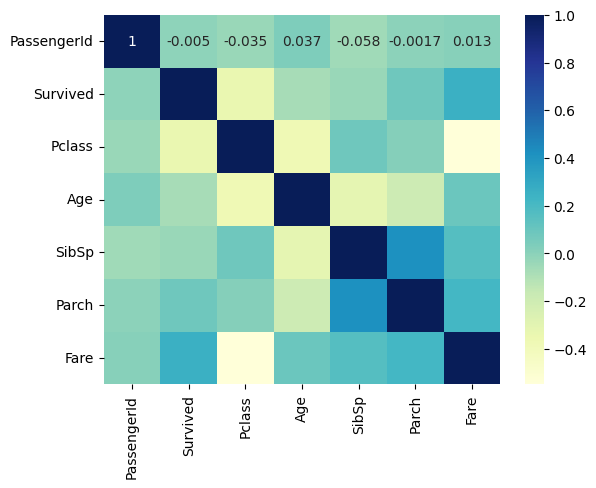

In [6]:
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [7]:
# splitting important variables with stratified shuffle split.

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)
for train_indices , test_indices in split.split(train_data, train_data[["Survived","Pclass","Sex"]]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set  = train_data.loc[test_indices]
    


In [8]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S


In [9]:
strat_test_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


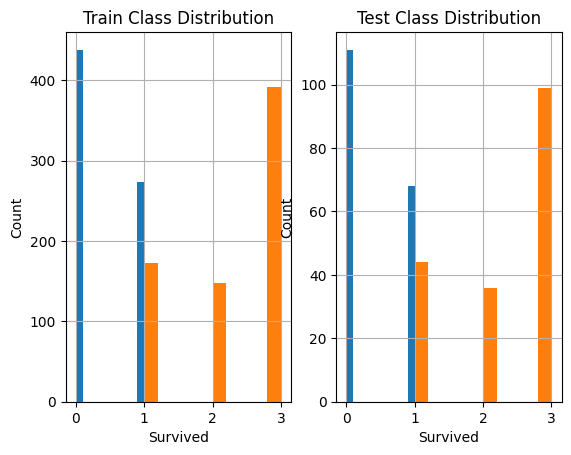

In [10]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.title('Train Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.title('Test Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

In [11]:
# age and cabins are two variables that have null values,now let us check them

missed_null = train_data.isnull().sum()
missed_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# imputing missing data, generally we drop them, we are going to impute(strategy to fill the missing values) Age with 
#estimators.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy = "median")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X


In [13]:
# we are going to encode columns that have multiple values within it , so we encode them into binary code.in our casa it is Sex
# and Embark

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        print("columns name before encoding", X.columns)
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["S","C","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X    

In [14]:
# we are going to drop irrelevent features

class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name","Sex","Cabin","Ticket","N"],axis=1, errors="ignore")
    # Embark and Sex is goingto drop because we already OneHotEncoded them

In [15]:
# these three estimators we are going to use in pipeline.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featurencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [16]:
strat_train_set = pipeline.fit_transform(strat_train_set)

columns name before encoding Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
 strat_train_set.info() # to check all data is non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 613 to 98
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   S            712 non-null    float64
 8   C            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [18]:
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male,Female
613,614,0,3,28.0,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
251,252,0,3,29.0,1,1,10.4625,0.0,0.0,1.0,1.0,0.0
42,43,0,3,28.0,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
868,869,0,3,28.0,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.0,1,1,20.2500,0.0,0.0,1.0,1.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
Y = strat_train_set['Survived']
scaler =StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [20]:
X_data

array([[ 0.66795518,  0.82789342, -0.10443798, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       [-0.75109033,  0.82789342, -0.0282301 , ...,  0.60981061,
         1.35941164, -1.35941164],
       [-1.57037352,  0.82789342, -0.10443798, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       ...,
       [ 0.09955297,  0.82789342, -0.10443798, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       [-1.0254914 , -0.37019624, -0.10443798, ..., -1.6398534 ,
        -0.73561236,  0.73561236],
       [-1.35085267, -0.37019624,  0.35280932, ...,  0.60981061,
         1.35941164, -1.35941164]])

# Train the Data RandomForestClassifier

In [21]:
# now we are going to train the model with Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

cv_param = {
     "max_depth" : [ None, 5, 10],
     "n_estimators":[10, 100, 200, 500],
     "min_samples_split": [2,3,4],
     "max_features":[1.0],
     "min_samples_leaf":[1]
}

scoring = {"accuracy", "precision", "recall", "f1"}

rf1 = GridSearchCV(rf, cv_param,scoring=scoring, cv=4, refit='f1', return_train_score=True)
rf1.fit(X_data, Y_data)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': [1.0],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             refit='f1', return_train_score=True,
             scoring={'precision', 'recall', 'accuracy', 'f1'})

In [22]:
import pickle
path = "C:\\Users\\Rehan\\Titanic\\"

In [23]:
def model_pickle(path, model_object,save_name:str):
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [24]:
def read_pickle(path, saved_model_named:str):
    with open(path + saved_model_named+ '.pickle',rb) as to_read:
        model = pickle.load(to_read)
        
        return model

In [25]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [27]:
rf1.best_score_

0.7563226080022167

In [28]:
final_score = rf1.best_estimator_
final_score

RandomForestClassifier(max_features=1.0, min_samples_split=3)

In [29]:
# now we apply the same method for stratified test set

In [30]:
strat_test_set = pipeline.fit_transform(strat_test_set)

columns name before encoding Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [31]:
X_test = strat_test_set.drop(["Survived"], axis=1)
Y_test = strat_test_set["Survived"]

scaler = StandardScaler()

X_test_data = scaler.fit_transform(X_test)
Y_test_data = Y_test.to_numpy()

In [32]:
X_test_data

array([[ 0.79080498,  0.82534717, -0.13523011, ...,  0.55368704,
        -0.74600385,  0.74600385],
       [-0.77406488, -0.3660814 ,  0.28853422, ...,  0.55368704,
        -0.74600385,  0.74600385],
       [-0.97205328, -1.55750997,  1.21311094, ...,  0.55368704,
        -0.74600385,  0.74600385],
       ...,
       [ 0.90883653, -1.55750997, -0.17375414, ..., -1.80607441,
        -0.74600385,  0.74600385],
       [-0.67126321,  0.82534717, -1.0212828 , ...,  0.55368704,
        -0.74600385,  0.74600385],
       [ 0.92406641, -0.3660814 , -0.32785026, ..., -1.80607441,
        -0.74600385,  0.74600385]])

In [33]:
final_score.score(X_test_data, Y_test_data)

0.8268156424581006

In [34]:
# first we distribute the data with stratified sampling then impute,drop and onehotencode the data and apply randomforest model
# on training data then on train_test data(remaining from distributed) and now apply it on the whole data while 
#we have another file called test file of the data next we are going to fit model on that . 

In [35]:
final_data = pipeline.fit_transform(train_data)

columns name before encoding Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [36]:
X_final = final_data.drop(['Survived'], axis=1)
Y_final = final_data["Survived"]

scaler = StandardScaler()

X_final_data = scaler.fit_transform(X_final)
Y_final_data = Y_final.to_numpy()


In [37]:
rfc = RandomForestClassifier()

cv_param = {
     "max_depth" : [ None, 5, 10],
     "n_estimators":[10, 100, 200, 500],
     "min_samples_split": [2,3,4],
     "max_features":[1.0],
     "min_samples_leaf":[1]
}

scoring = {"accuracy", "precision", "recall", "f1"}

rfc1 = GridSearchCV(rfc, cv_param,scoring=scoring, cv=4, refit='f1', return_train_score=True)
rfc1.fit(X_final_data, Y_final_data)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': [1.0],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             refit='f1', return_train_score=True,
             scoring={'f1', 'precision', 'accuracy', 'recall'})

In [38]:
def make_results(model_name:str, model_object, metric:str):
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }
    # getting results in cv_results in the form of DF
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # isolate the row of max estimator from the data frame
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extracting Accuracy, F1, Precision and recall from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    
    
    table = pd.DataFrame({"model name": [ model_name],
                          "F1":[f1],
                         "Recall":[recall],
                         "Accuracy":[accuracy],
                         "Precision":[precision]
                         },
                        )
    
    
    
    return table

In [39]:
results = make_results("RF CV", rfc1, 'f1')
results

,model name,F1,Recall,Accuracy,Precision
0,RF CV,0.707006,0.654207,0.800262,0.806708


In [40]:
final_estimators = rfc1.best_estimator_
final_estimators

RandomForestClassifier(max_depth=10, max_features=1.0, n_estimators=200)

In [41]:
rfc1.best_score_

0.7070061794032312

###now we are going to fit model on titanic test data and format it accordingly.

In [42]:
titanic_test_data =  pd.read_csv('C:\\Users\\Rehan\\Titanic\\test.csv')
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
final_test_data = pipeline.fit_transform(titanic_test_data)

columns name before encoding Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [45]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,S,C,Q,Male,Female
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.0,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,27.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [46]:
final_test_data.info() # there is 1 missing value in fare column so now w are going to use ffill 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   S            418 non-null    float64
 7   C            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [47]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [48]:
X_data_final_test

array([[-1.72791209,  0.87348191,  0.38623105, ..., -1.35067551,
        -0.75592895,  0.75592895],
       [-1.71962474,  0.87348191,  1.37137004, ...,  0.74037028,
         1.32287566, -1.32287566],
       [-1.71133739, -0.31581919,  2.55353683, ..., -1.35067551,
        -0.75592895,  0.75592895],
       ...,
       [ 1.71133739,  0.87348191,  0.70147553, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.71962474,  0.87348191, -0.20485235, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 1.72791209,  0.87348191, -0.20485235, ..., -1.35067551,
        -0.75592895,  0.75592895]])

In [49]:
predictions = rfc1.predict(X_data_final_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [50]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df['Survived'] = predictions
final_df.to_csv("C:\\Users\\Rehan\\Titanic\\predictions.csv", index=False)

In [51]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
